# C-TAEA


This algorithm is implemented based on <cite data-cite="ctaea"></cite> and the authors' [implementation](https://web.archive.org/web/20200916105021/https://cola-laboratory.github.io/docs/publications). The algorithm is based on [Reference Directions](../../misc/reference_directions.ipynb) which need to be provided when initializing the algorithm object.

C-TAEA follows a two archive approach to balance convergence (Convergence Archive CA) and diversity (Diversity Archive DA).

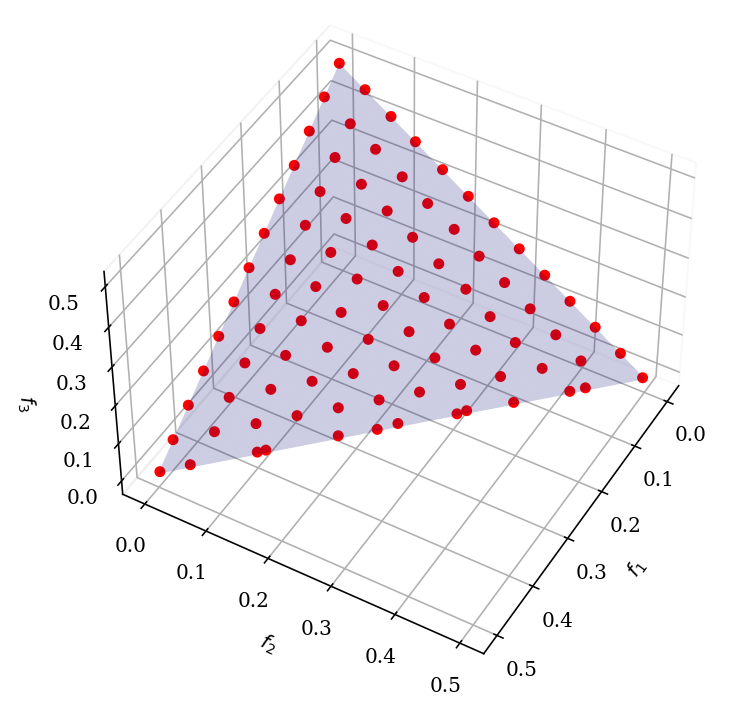

In [1]:
from pymoo.algorithms.moo.ctaea import CTAEA
from pymoo.factory import get_problem, get_reference_directions
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("c1dtlz1", None, 3, k=5)

ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)

# create the algorithm object
algorithm = CTAEA(ref_dirs=ref_dirs)

# execute the optimization
res = minimize(problem,
               algorithm,
               ('n_gen', 600),
               seed=1
               )

sc = Scatter(legend=False, angle=(45, 30))
sc.add(problem.pareto_front(ref_dirs), plot_type='surface', alpha=0.2, label="PF", color="blue")
sc.add(res.F, color="red")
sc.show()

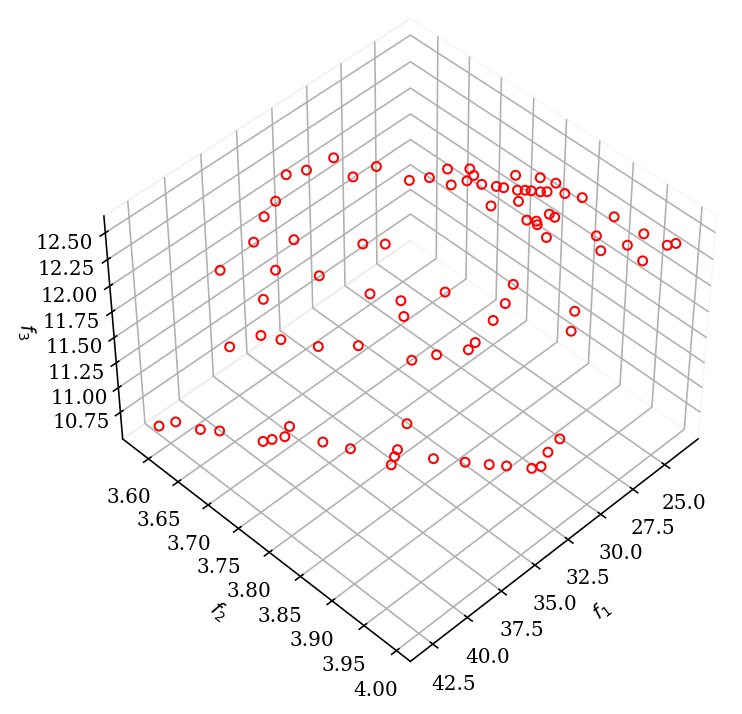

In [2]:
problem = get_problem("carside")
ref_dirs = get_reference_directions("das-dennis", problem.n_obj, n_points=91)
algorithm = CTAEA(ref_dirs=ref_dirs)

res = minimize(problem,
               algorithm,
               ('n_gen', 600),
               seed=1
               )

Scatter().add(res.F, facecolor="none", edgecolor="red").show()

## API

Python implementation by [cyrilpic](https://github.com/cyrilpic) based on the [original C code](https://web.archive.org/web/20200916105021/https://cola-laboratory.github.io/docs/publications).